## Classification of reviews from imdb.com

Download the dataset from [kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from adjustText import adjust_text

## Load dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/IMDB_dataset/clean_tweets')

In [3]:
df['tweet_split'] = df['tweet'].str.split(' ')

In [4]:
df

,tweet,sentiment,tweet_split
0,reviewer mentioned watching episode hooked rig...,1,"[reviewer, mentioned, watching, episode, hooke..."
1,wonderful little production filming technique ...,1,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake think zombie ...,0,"[basically, family, little, boy, jake, think, ..."
4,petter mattei love time money visually stunnin...,1,"[petter, mattei, love, time, money, visually, ..."
...,...,...,...
49995,thought movie right good job wasn creative ori...,1,"[thought, movie, right, good, job, wasn, creat..."
49996,bad plot bad dialogue bad acting idiotic direc...,0,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,catholic taught parochial elementary school nu...,0,"[catholic, taught, parochial, elementary, scho..."
49998,going disagree previous comment maltin second ...,0,"[going, disagree, previous, comment, maltin, s..."


## Training model

In [5]:
model = Word2Vec(min_count=20,
                 window=3,
                 size=400)

In [6]:
model.build_vocab(df['tweet_split'])

In [7]:
# train model
model.train(df['tweet_split'], 
            total_examples=len(df['tweet_split']), 
            epochs=20)

(90417194, 100583060)

In [8]:
words=model.wv.vocab.keys()

In [9]:
len(words)

16992

In [10]:
X_word = model.wv.vectors

In [11]:
X_word.shape

(16992, 400)

In [12]:
X_embed = TSNE().fit_transform(X_word)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [13]:
X_word

array([[-0.06255254,  0.05503182, -0.8791293 , ...,  0.36123273,
         0.09598456,  0.09130669],
       [-0.16676079, -0.19994019, -0.9698984 , ...,  0.35413802,
         0.25892806,  0.09953993],
       [ 0.5142158 ,  0.5069287 ,  0.28870875, ..., -0.6878716 ,
         0.4862487 ,  0.13501498],
       ...,
       [-0.05244623,  0.00648626,  0.13831222, ..., -0.29675254,
        -0.10239427,  0.10125794],
       [-0.18546273, -0.23370284,  0.40865177, ..., -0.33860278,
        -0.53976905, -0.42004132],
       [-0.15764266, -0.38071582,  0.06126721, ...,  0.12270422,
         0.05376288,  0.18085167]], dtype=float32)

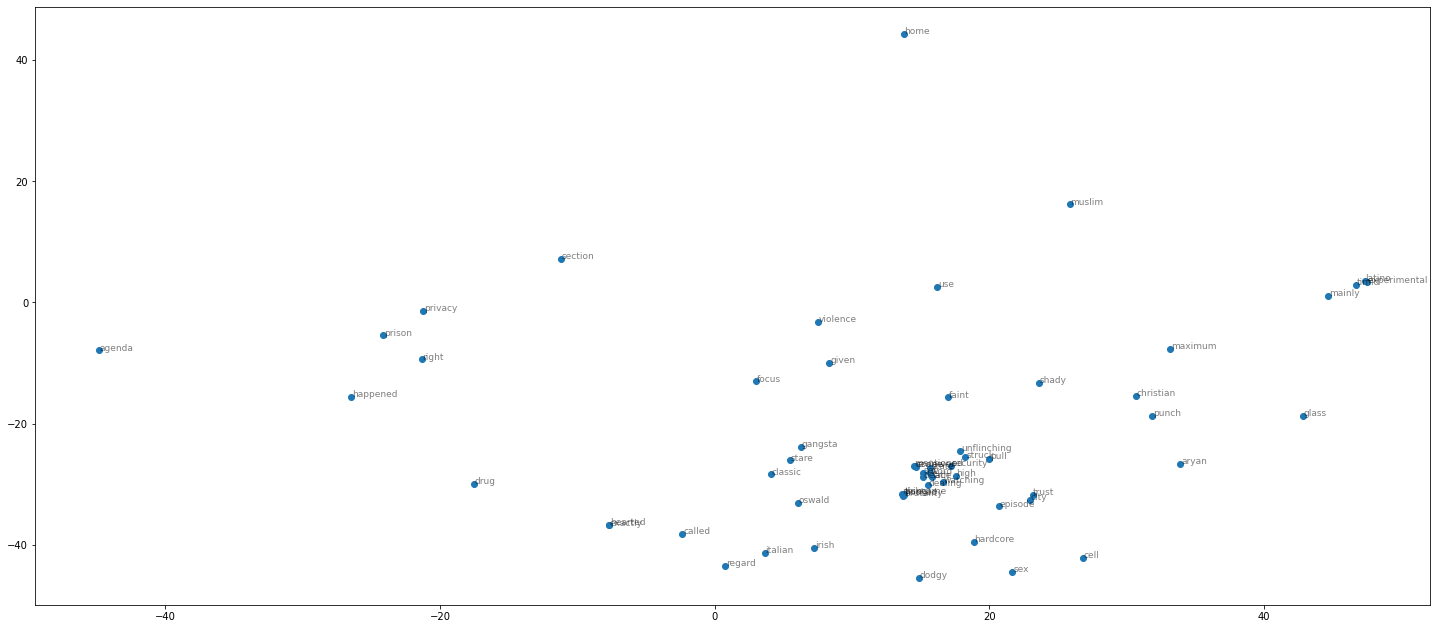

In [14]:
plt.figure(figsize=(25, 11))
plt.scatter(X_embed[:60, 0], X_embed[:60, 1])
annotations = []
for i, word in enumerate(list(words)[:60]):
    annotations.append(plt.annotate(word, xy=(X_embed[i, 0]+.05, X_embed[i, 1]), fontsize=9, alpha=.5, ))